In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()


Saving sample_nutrition_dataset.csv to sample_nutrition_dataset.csv


In [3]:
df = pd.read_csv("sample_nutrition_dataset.csv")

In [ ]:
(df.head())

,Food,Calories,Protein_g,Fat_g,Carbs_g
0,Apple,52,0.3,0.2,14.0
1,Banana,96,1.3,0.3,27.0
2,Chicken Breast,165,31.0,3.6,0.0
3,Rice,130,2.7,0.3,28.0
4,Broccoli,55,3.7,0.6,11.0


In [4]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Food       8 non-null      object 
 1   Calories   8 non-null      int64  
 2   Protein_g  8 non-null      float64
 3   Fat_g      8 non-null      float64
 4   Carbs_g    8 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 452.0+ bytes


In [5]:
(df.describe())

,Calories,Protein_g,Fat_g,Carbs_g
count,8.000000,8.000000,8.000000,8.000000
mean,148.375000,8.700000,7.612500,13.450000
std,179.116034,11.181873,17.179509,11.182512
min,42.000000,0.300000,0.200000,0.000000
25%,54.250000,2.350000,0.300000,4.000000
50%,82.000000,3.550000,0.800000,12.500000
75%,138.750000,9.800000,3.950000,22.950000
max,579.000000,31.000000,49.900000,28.000000


In [6]:
df.isnull().sum()

,0
Food,0
Calories,0
Protein_g,0
Fat_g,0
Carbs_g,0


In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df.dtypes



,0
Food,object
Calories,int64
Protein_g,float64
Fat_g,float64
Carbs_g,float64


In [9]:
df.sort_values(by="Calories", ascending=False).head(10)


,Food,Calories,Protein_g,Fat_g,Carbs_g
7,Almonds,579,21.2,49.9,21.6
2,Chicken Breast,165,31.0,3.6,0.0
3,Rice,130,2.7,0.3,28.0
1,Banana,96,1.3,0.3,27.0
6,Egg,68,6.0,5.0,1.0
4,Broccoli,55,3.7,0.6,11.0
0,Apple,52,0.3,0.2,14.0
5,Milk,42,3.4,1.0,5.0


In [10]:
 # Protein, Fat, Carbs Distribution

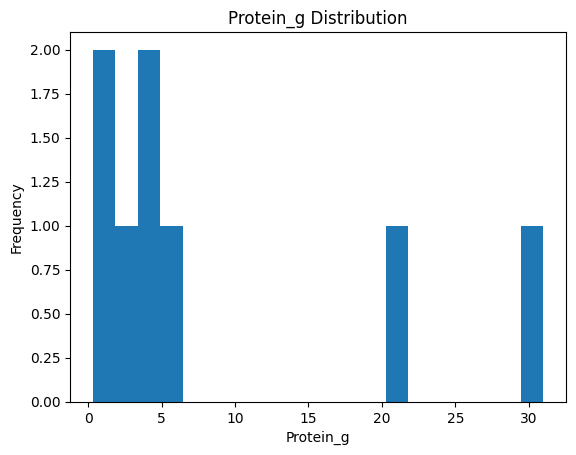

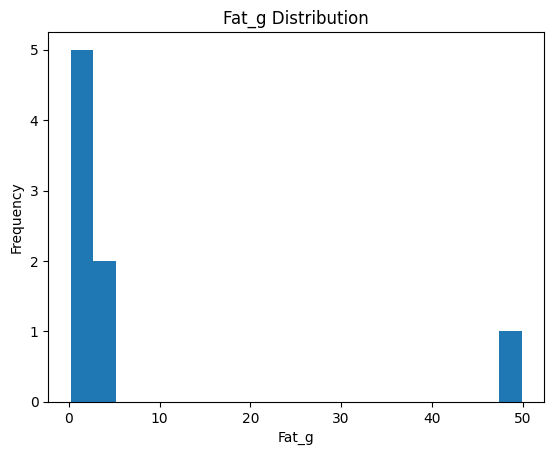

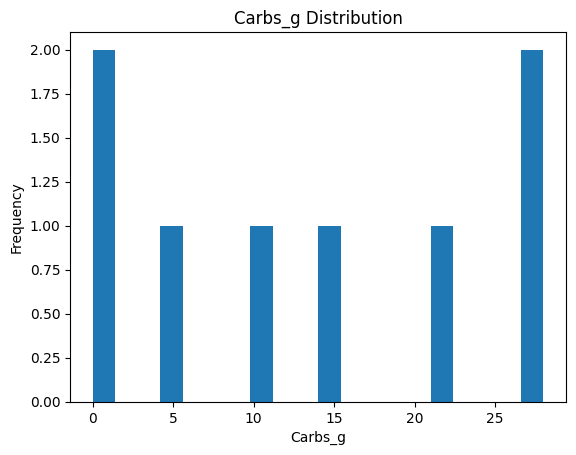

In [11]:
import matplotlib.pyplot as plt

features = ['Protein_g', 'Fat_g', 'Carbs_g']

for feature in features:
    plt.figure()
    plt.hist(df[feature], bins=20)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
#  Correlation Heatmap

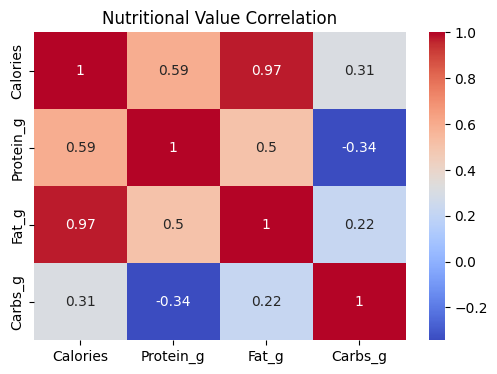

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Nutritional Value Correlation")
plt.show()


In [ ]:
# Top 10 Protein-Rich Foods

In [13]:
top_protein = df.sort_values(by='Protein_g', ascending=False).head(10)
top_protein[['Food', 'Protein_g']]


,Food,Protein_g
2,Chicken Breast,31.0
7,Almonds,21.2
6,Egg,6.0
4,Broccoli,3.7
5,Milk,3.4
3,Rice,2.7
1,Banana,1.3
0,Apple,0.3


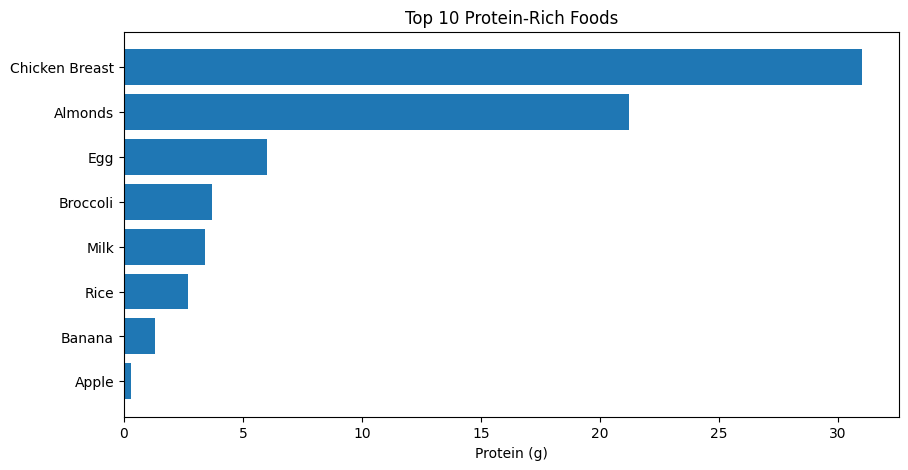

In [14]:
plt.figure(figsize=(10,5))
plt.barh(top_protein['Food'], top_protein['Protein_g'])
plt.xlabel("Protein (g)")
plt.title("Top 10 Protein-Rich Foods")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#  Fat vs Carbs Scatter Plot

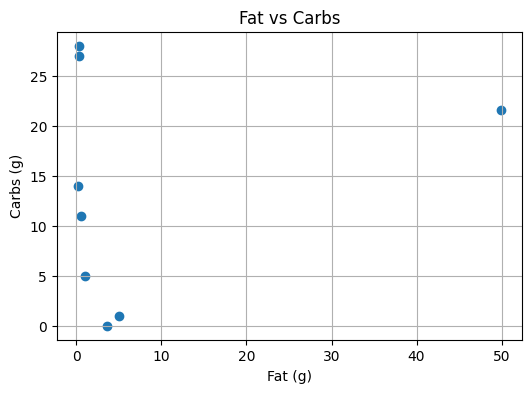

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(df['Fat_g'], df['Carbs_g'])
plt.xlabel('Fat (g)')
plt.ylabel('Carbs (g)')
plt.title('Fat vs Carbs')
plt.grid(True)
plt.show()


In [ ]:
#  Pie Chart of Macronutrient Contribution

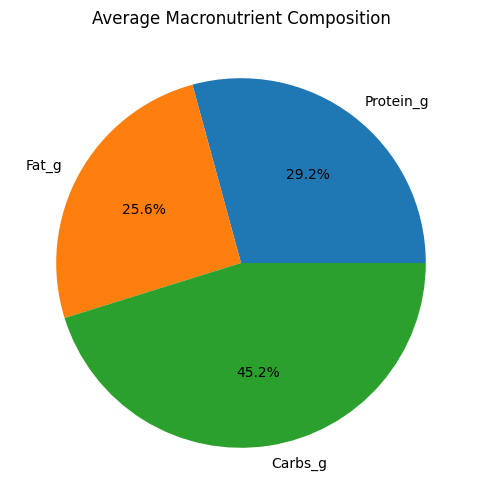

In [16]:
avg_macros = df[['Protein_g', 'Fat_g', 'Carbs_g']].mean()

plt.figure(figsize=(6,6))
plt.pie(avg_macros, labels=avg_macros.index, autopct='%1.1f%%')
plt.title('Average Macronutrient Composition')
plt.show()


In [ ]:
# Nutrient Density (per 100 Calories)

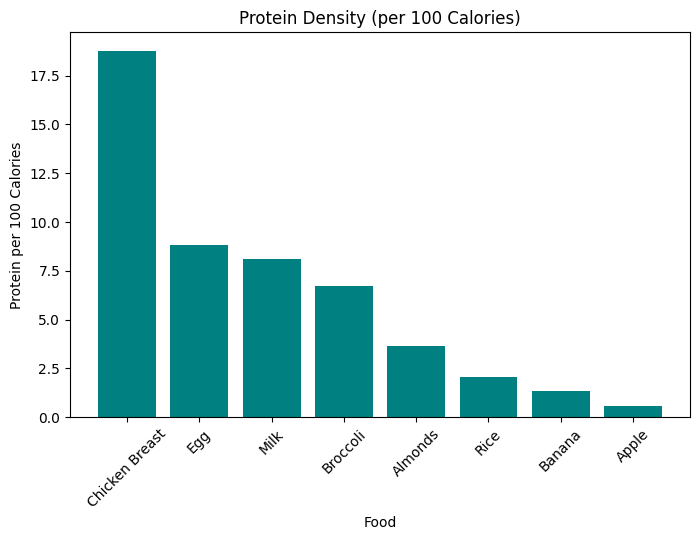

In [17]:
# Nutrient Density (Protein per 100 Calories)
df['Protein_per100Cal'] = (df['Protein_g'] / df['Calories']) * 100

# Top foods by protein density
protein_dense = df.sort_values(by='Protein_per100Cal', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(protein_dense['Food'], protein_dense['Protein_per100Cal'], color='teal')
plt.title("Protein Density (per 100 Calories)")
plt.xlabel("Food")
plt.ylabel("Protein per 100 Calories")
plt.xticks(rotation=45)
plt.show()


In [18]:
# Clustering Foods by Nutrition (KMeans)

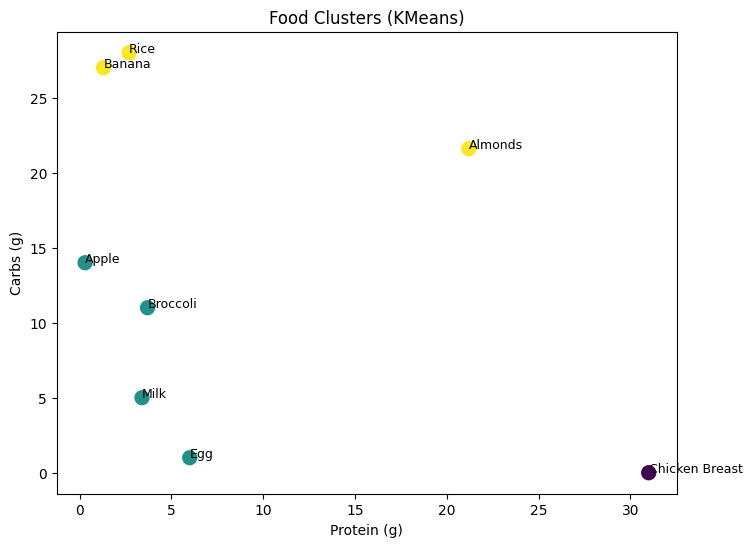

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
X = df[['Protein_g', 'Fat_g', 'Carbs_g']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Protein_g'], df['Carbs_g'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel("Protein (g)")
plt.ylabel("Carbs (g)")
plt.title("Food Clusters (KMeans)")
for i, food in enumerate(df['Food']):
    plt.text(df['Protein_g'][i], df['Carbs_g'][i], food, fontsize=9)
plt.show()


In [ ]:
# Healthy Food Recommendation Function

In [20]:
def recommend_food(goal="high protein"):
    if goal == "high protein":
        return df.sort_values(by="Protein_g", ascending=False).head(5)
    elif goal == "low carb":
        return df.sort_values(by="Carbs_g").head(5)
    elif goal == "low calorie":
        return df.sort_values(by="Calories").head(5)
    else:
        return "Goal not recognized. Try 'high protein', 'low carb', or 'low calorie'."

print("Top High Protein Foods:\n", recommend_food("high protein"))
print("\nTop Low Carb Foods:\n", recommend_food("low carb"))


Top High Protein Foods:
              Food  Calories  Protein_g  Fat_g  Carbs_g  Protein_per100Cal  \
2  Chicken Breast       165       31.0    3.6      0.0          18.787879   
7         Almonds       579       21.2   49.9     21.6           3.661485   
6             Egg        68        6.0    5.0      1.0           8.823529   
4        Broccoli        55        3.7    0.6     11.0           6.727273   
5            Milk        42        3.4    1.0      5.0           8.095238   

   Cluster  
2        0  
7        2  
6        1  
4        1  
5        1  

Top Low Carb Foods:
              Food  Calories  Protein_g  Fat_g  Carbs_g  Protein_per100Cal  \
2  Chicken Breast       165       31.0    3.6      0.0          18.787879   
6             Egg        68        6.0    5.0      1.0           8.823529   
5            Milk        42        3.4    1.0      5.0           8.095238   
4        Broccoli        55        3.7    0.6     11.0           6.727273   
0           Apple        52

In [ ]:
 # Daily Intake Goal Check

In [21]:
# daily goal
daily_goal = {"Calories": 2000, "Protein_g": 50, "Fat_g": 70, "Carbs_g": 250}

# selected foods
selected_foods = ["Apple", "Rice", "Chicken Breast"]

# Calculate totals
totals = df[df['Food'].isin(selected_foods)][['Calories','Protein_g','Fat_g','Carbs_g']].sum()

# Compare with goal
progress = (totals / pd.Series(daily_goal)) * 100
print("Daily Nutrition Progress (%):\n", progress)


Daily Nutrition Progress (%):
 Calories     17.350000
Protein_g    68.000000
Fat_g         5.857143
Carbs_g      16.800000
dtype: float64
